### Import dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("games.csv") # Import als df, Komma als seperator

### Einfache Beschreibung des Datensatzes

In [3]:
print('Anzahl der Spiele:', len(df))
print('Davon gewertete Spiele:', len(df[df["rated"] == True]), '(entspricht', 100 * round(len(df[df["rated"] == True])/len(df), 4) ,'%)')
print()
print('Minimale Anzahl gezogener Züge:', df["turns"].min())
print('Maximale Anzahl gezogener Züge:', df["turns"].max())
print('Durchschnittliche Anzahl gezogener Züge:', df["turns"].mean())
print()
print('Partieausgang:')
print('Schachmatt:', 100 * round(len(df[df["victory_status"] == "mate"])/len(df), 4), '%')
print('Aufgabe:', 100 * round(len(df[df["victory_status"] == "resign"])/len(df), 4), '%')
print('Ablauf der Zeit:', 100 * round(len(df[df["victory_status"] == "outoftime"])/len(df), 4), '%')
print('Remis:', 100 * round(len(df[df["victory_status"] == "draw"])/len(df), 4), '% (Remis bei Ablauf der Zeit hier nicht mit eingerechnet)')
print()
print('Anteil der gewonnen Spiele:') 
print('Weiß:', 100 * round(len(df[df["winner"] == "white"])/len(df), 4), '%')
print('Schwarz:', 100 * round(len(df[df["winner"] == "black"])/len(df), 4), '%')
print('Remis:', 100 * round(len(df[df["winner"] == "draw"])/len(df), 4), '%')
print()
# Unterteile Zeitbegrenzung in Bullet(1-2), Blitz(3-7), Rapid(8-22) und Classical(23-180), ignoriere Inkremente
# Erstelle zunächst Variable mit Zeitbegrenzung ohne Inkrement als Integer
df["time_control"] = np.nan
for i in range(len(df)):
    df["time_control"][i] = int(df["increment_code"][i].partition("+")[0])
print('Zeitbegrenzung der Spiele:') 
print('Bullet (1-2 Minuten):', 100 * round(len(df[df["time_control"] <= 2])/len(df), 4), '%')
print('Blitz (3-7 Minuten):', 100 * round(len(df[(df["time_control"] >= 3) & (df["time_control"] <= 7)])/len(df), 4), '%')
print('Rapid (8-20 Minuten):', 100 * round(len(df[(df["time_control"] >= 8) & (df["time_control"] <= 22)])/len(df), 4), '%')
print('Classical (25-180 Minuten):', 100 * round(len(df[df["time_control"] >= 23])/len(df), 4), '%')
print()
print('Anzahl Spieler:', len(df["white_id"].unique()) + len(df["black_id"].unique()))
print('Durschnittliche Anzahl Spiele pro Spieler:',  round((2 * len(df)) / (len(df["white_id"].unique()) + len(df["black_id"].unique())), 2))
print()
print('Kleinste Spielerwertung (ELO):', min(df[["white_rating", "black_rating"]].min()))
print('Größte Spielerwertung:', max(df[["white_rating", "black_rating"]].max()))
print('Durchschnittliche Spielerwertung:', round(sum(df[["white_rating", "black_rating"]].sum()) / (2 *len(df))))
print()
print('Erster Zug:')
df["first_move"] = np.nan
for i in range(len(df)):
    df["first_move"][i] = df["moves"][i].partition(' ')[0]
for i in df["first_move"].unique():
    print(i + ':', round(100 * len(df[df["first_move"] == i])/len(df), 2), '%', )
print()
print('Gespielte Eröffnungen:')
for i in df["opening_name"].unique():
    if len(df[df["opening_name"] == i])/len(df) > 0.01:
        print(i + ':', round(100 * len(df[df["opening_name"] == i])/len(df), 2), '%', )


# Evtl. hier noch Eröffnungszug und Eröffnung

Anzahl der Spiele: 20058
Davon gewertete Spiele: 16155 (entspricht 80.54 %)

Minimale Anzahl gezogener Züge: 1
Maximale Anzahl gezogener Züge: 349
Durchschnittliche Anzahl gezogener Züge: 60.46599860404826

Partieausgang:
Schachmatt: 31.53 %
Aufgabe: 55.57 %
Ablauf der Zeit: 8.38 %
Remis: 4.52 % (Remis bei Ablauf der Zeit hier nicht mit eingerechnet)

Anteil der gewonnen Spiele:
Weiß: 49.86 %
Schwarz: 45.4 %
Remis: 4.74 %

Zeitbegrenzung der Spiele:
Bullet (1-2 Minuten): 0.65 %
Blitz (3-7 Minuten): 13.73 %
Rapid (8-20 Minuten): 77.62 %
Classical (25-180 Minuten): 7.99 %

Anzahl Spieler: 18769
Durschnittliche Anzahl Spiele pro Spieler: 2.14

Kleinste Spielerwertung (ELO): 784
Größte Spielerwertung: 2723
Durchschnittliche Spielerwertung: 1593

Erster Zug:
d4: 22.54 %
e4: 62.81 %
e3: 2.07 %
c4: 3.57 %
Nf3: 3.61 %
a4: 0.14 %
Nh3: 0.07 %
g3: 0.93 %
h4: 0.16 %
f4: 0.83 %
b4: 0.44 %
Nc3: 0.49 %
b3: 0.86 %
h3: 0.07 %
d3: 0.65 %
f3: 0.11 %
g4: 0.19 %
a3: 0.13 %
c3: 0.28 %
Na3: 0.02 %

Gespielte

### Einfacher Test
Teste, ob weiß allgemein öfter gewinnt als schwarz mithilfe eine Binomialtests 

In [4]:
res = stats.binomtest(len(df[df['winner'] == 'white']), len(df[(df['winner'] == 'white') | (df['winner'] == 'black')]), alternative = 'greater')

p = 5.2 * 10^(-11) <br>
Die Ws. dass Weiß gewinnt, ist signifikant höher, als die Ws., dass Schwarz gewinnt.

### Durchschnittl. Spielerwertung Analyse
Analysiere zunächst, ob die durchschnittliche Spielerwertung beider Gegner in einem Spiel einen Einfluss auf den Spielausgang hat. Nutze hierfür nur Spiele, bei denen die Differenz der beiden Spielerwertungen nicht höher 100 ist. Bilde dann die durchschnitt. Spielerwertung beider Spiele und teile die durchschnittl. Spielerwertungen in acht Kategorien ein, welche jeweils die gleiche Anzahl an Spielen haben.

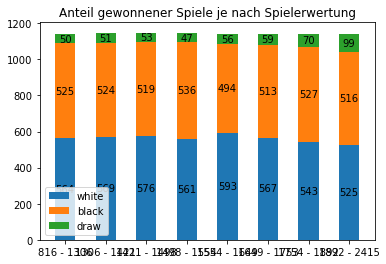

0.006530017254715292


In [141]:
div = 8 # Anzahl Abstufungen für die durchschnittl. Spielerwertung

# print('Anteil der gewonnenen Spiele je nach Spielerwertung:')

# Erstelle Variable mit durchschnittlichem Rating beider Spieler pro Spiel
df["avg_rating"] = (df["white_rating"] + df["black_rating"])/2 

# Lösche Spiele aus Datensatz mit Unterschied der Wertungen von >= 100
df2 = df[np.abs(df["black_rating"] - df["white_rating"]) < 100]

rating = list(str(" ") * div) # Vektor für Spielerwerungs-Abstufungen
winner = {"white": np.zeros(div), "black": np.zeros(div), "draw": np.zeros(div)} # Dictionary, um jeweils Anz. der Siege für weiß/schwarz/Remis zu zählen.
winner_perc = {"white": np.zeros(div), "black": np.zeros(div), "draw": np.zeros(div)} # Prozentual

# Vergleich von ausschließlich Sieg weiß /schwarz (ignoriere Remis)
winner_wb = {"white": np.zeros(div), "black": np.zeros(div)} 
winner_perc_wb = {"white": np.zeros(div), "black": np.zeros(div)}
# Erstelle Datensatz ohne Remis
df2_wb = df2[df2['winner'] != 'draw']

for i in range(1, div+1): # Führe Schleife für jede Abstufung der Spielerwertung aus
    # Berechne Minimal- und Maximalrating der aktuellen Stufe basierend auf Anz. der Unterteilung 'div'. Alle Abstufunfen sollen gleiche Länge haben:
    min_rat = min(df2["avg_rating"].sort_values().iloc[(i-1)*int(len(df2)/div):i*int(len(df2)/div)])
    max_rat = max(df2["avg_rating"].sort_values().iloc[(i-1)*int(len(df2)/div):i*int(len(df2)/div)])
    rating[i-1] = str(int(min_rat)) + ' - ' + str(int(max_rat)) # Trage Min.- und Max.-Rating in 'rating'-Vektor ein
    
    # Das gleiche für den wb-Datensatz
    min_rat_wb = min(df2_wb["avg_rating"].sort_values().iloc[(i-1)*int(len(df2_wb)/div):i*int(len(df2_wb)/div)])
    max_rat_wb = max(df2_wb["avg_rating"].sort_values().iloc[(i-1)*int(len(df2_wb)/div):i*int(len(df2_wb)/div)])
    
    df3 = df2[(df2["avg_rating"] >= min_rat) & (df2["avg_rating"] <= max_rat)] # Erstelle Datensatz, welcher nur aktuelle Stufe der durchschnittl. Spielerwertungen beinhaltet
    df3_wb = df2_wb[(df2_wb["avg_rating"] >= min_rat_wb) & (df2_wb["avg_rating"] <= max_rat_wb)]
    
    # print('Rating', min_rat, 'to', max_rat, ':', )
    
    # Zähle Anzahl an Siegen für weiß / schwarz / Remis und trage Ergebnis in 'winner'-Dictionary ein:
    for j in df3["winner"].unique():
        # print(j + ':', round(100 * len(df3[(df3["winner"] == j)]) / len(df3), 2), '%')
        winner[j][i-1] = len(df3[(df3["winner"] == j)])
        winner_perc[j][i-1] = len(df3[(df3["winner"] == j)]) / len(df3)  
        
    for j in df3_wb["winner"].unique():
        # print(j + ':', round(100 * len(df3[(df3["winner"] == j)]) / len(df3), 2), '%')
        winner_wb[j][i-1] = len(df3_wb[(df3_wb["winner"] == j)])
        winner_perc_wb[j][i-1] = len(df3_wb[(df3_wb["winner"] == j)]) / len(df3_wb)  

# Make plot
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(div)
for boolean, weight_count in winner.items():
    p = ax.bar(rating, weight_count, width, label = boolean, bottom = bottom)
    ax.bar_label(p, label_type = 'center')
    bottom += weight_count
ax.set_title("Anteil gewonnener Spiele je nach Spielerwertung")
ax.legend(loc="lower left")
plt.show()

# Signifikanztests
draw_chisq = stats.chisquare(winner['draw']) # Teste, ob es für die verschiedenen Spielerwertungen einen Unterschied in der Anz. der Remis gibt
draw_spearm = stats.spearmanr(winner['draw'], range(div)) # Teste, ob es zwsichen Anz. Remis und Spielerwertung eine Korrelation in eine bestimmte Richtung gibt
print(draw_spearm.pvalue)
white_chisq = stats.chisquare(winner_wb['white']) # Teste, ob es für die verschiedenen Spielerwertungen einen Unterschied in der Anz. der Siege für weiß / schwarz gibt
black_chisq = stats.chisquare(winner_wb['black'])
white_spearm = stats.spearmanr(winner_wb['white'], range(div))
black_spearm = stats.spearmanr(winner_wb['black'], range(div))

Remis-Rate: <br>
Chi²-Homogenitätstest: p-Wert: 2,09 * 10^(-5) <br>
=> Die Anzahl an Remis ändert sich für die versch. Spielerwertungen <br>
Spearman-Korrelation: p-Wert: 0,00653, Korrelationskoeffizient: 0,857 <br>
=> Es ist eine starke positive Korrelation zwischen Remis-Rate und Spielerwertung zu erkennen <br>
<br>
Gewinnrate weiß / schwarz: <br>
Chi²-Homogenitätstest Sieg Weiß: p-Wert: 0.989 <br>
Spearman-Korrelation Sieg Weiß: p-Wert: 0.588, Korrelationskoeffizient: -0.228 <br>
Ergebnisse für Sieg Schwarz ähnlich <br>
=> Die Gewinnraten von weiß gegenüber schwarz ändern sich für die versch. Spielerwertungen nicht signifikant

### Erster Zug Analyse
- Hat der erste Zug einen Einfluss auf den Spielausgang (Sieg weiß / schwarz / Remis)? 

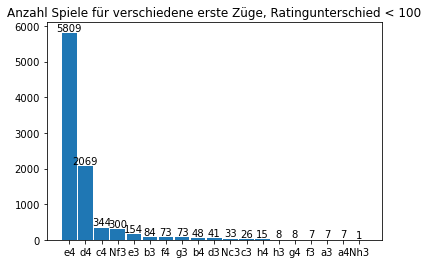

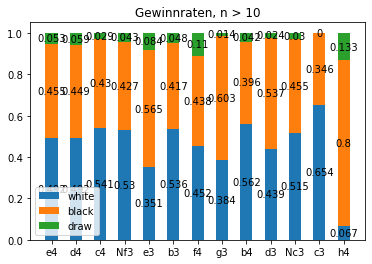

Remis-Rate gg.über allen anderen Zügen, p-Werte Homogenitätstest:
e4: 0.7586534535371603
d4: 0.18742515950259153
c4: 0.05368850277668821
Nf3: 0.5068081281912578
e3: 0.12345278857221949
b3: 1.0
f4: 0.06034193577640522
g3: 0.20924751122727744
b4: 0.9656309134043631
d3: 0.6298906142982268
Nc3: 0.8373700417368221
c3: 0.43697990371457607
h4: 0.42284719916175795

Sieganteil weiß gg.über schwarz, p-Werte Homogenitätstest:
e4: 1.0
d4: 0.7889604466188467
c4: 0.18282044625223687
Nf3: 0.26119178948540783
e3: 0.0014167454987725732
b3: 0.5107798449801609
f4: 0.9444285493532513
g3: 0.03465310993807473
b4: 0.4426719900234031
d3: 0.4680663894191377
Nc3: 1.0
c3: 0.24010430107469855
h4: 0.0035009169642837464


In [68]:
# Alle Wertungen: Gespielte erste Züge und Gewinnchancen
moves_tbl =  pd.DataFrame({"first_move": df2["first_move"].unique(), "count": df2["first_move"].value_counts(sort = False)}).sort_values("count", ascending = False)
fig, ax = plt.subplots()
p = ax.bar(moves_tbl["first_move"], moves_tbl["count"], width = 0.9)
ax.bar_label(p)
ax.set_title('Anzahl Spiele für verschiedene erste Züge, Ratingunterschied < 100')
plt.show()

moves1 = moves_tbl[moves_tbl['count'] > 10]['first_move'].tolist()
winner = {'white': np.zeros(len(moves1)), 'black': np.zeros(len(moves1)), 'draw': np.zeros(len(moves1))}
perc = {'white': np.zeros(len(moves1)), 'black': np.zeros(len(moves1)), 'draw': np.zeros(len(moves1))}
for i in range(len(moves1)):
    for j in ['white', 'black', 'draw']:
        perc[j][i] = round(len(df2[(df2["first_move"] == moves1[i]) & (df2["winner"] == j)]) / len(df2[df2["first_move"] == moves1[i]]), 3)
        winner[j][i] = round(len(df2[(df2["first_move"] == moves1[i]) & (df2["winner"] == j)]))


fig, ax = plt.subplots()
bottom = np.zeros(len(moves1))  
for boolean, weight_count in perc.items():
    p = ax.bar(moves1, weight_count, width = 0.5, label = boolean, bottom = bottom)
    ax.bar_label(p, label_type = 'center')
    bottom += weight_count
ax.legend(loc = "lower left")        
ax.set_title('Gewinnraten, n > 10')
plt.show()

# Beobachtungen: 
# Für den ersten Zug 'Nf3' scheint die Remis-Rate höher zu sein
# Für 'c4' und 'Nf3' scheinen die Siegchancen für weiß noch höher zu sein

# Signifikanztests
# Erstelle Matrix für Remis - Nicht-Remis
draws = [(winner['white'] + winner['black']).tolist(), winner['draw'].tolist()]
print('Remis-Rate gg.über allen anderen Zügen, p-Werte Homogenitätstest:')
# Erstelle jeweils Matrix für ersten Zug i Remis - Nicht-Remis gegenüber alle anderen ersten Zügen:
for i in range(len(draws[0])):
    draws_firstmov_i = [[draws[0][i], sum(draws[0][0:i]) + sum(draws[0][i+1:len(draws[0])])], [draws[1][i],sum(draws[1][0:i]) + sum(draws[1][i+1:len(draws[0])])]]
    draws_test = stats.chi2_contingency(draws_firstmov_i) # Chi-Quadrat-Test
    print(str(moves1[i]) + ': ' + str(draws_test.pvalue))

# Teste Gewinnraten für versch. erste Züge
wins = [winner['white'].tolist(),  winner['black'].tolist()]
print()
print('Sieganteil weiß gg.über schwarz, p-Werte Homogenitätstest:')
for i in range(len(moves1)):
    wins_firstmov_i = [[wins[0][i], sum(wins[0][0:i]) + sum(wins[0][i+1:len(wins[0])])], [wins[1][i],sum(wins[1][0:i]) + sum(wins[1][i+1:len(wins[0])])]]
    wins_test = stats.chi2_contingency(wins_firstmov_i) # Kontingenz-Test
    print(str(moves1[i]) + ': ' + str(wins_test.pvalue))



Ergebnis:
- Die Remis-Rate ist für keinen der versch. ersten Züge erhöht ode verringert. Für den ersten Zug c4 zeigt sich aber ein leichter Trend zu einer geringeren Remis-Rate und für f4 ein leichter Trend zu einer höheren Remis-Rate.
- Was die Gewinnchancen angeht, gibt es drei erste Züge, bei welchen der Sieganteil von Schwarz signifikant erhöht ist: e3, g3 und h4. Keiner der ersten Züge führt zu einer signifikanten Eröhung des Sieganteiles für Weiß. Als weißer Spieler (Spieler mit den weißen Spielsteinen, Spieler selbst kann dabei auch dunkelhäutig sein) kann man also nur "verkacken" und nicht "ownen".

### Erster Zug + Spielerwertung Analyse
- Ist es für versch. durchschnittl. Spielerwertungen vorteilhafter, einen best. ersten Zug zu spielen?

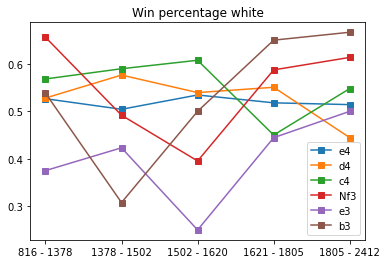

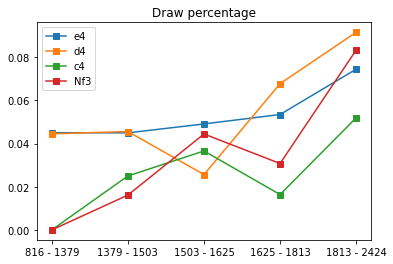

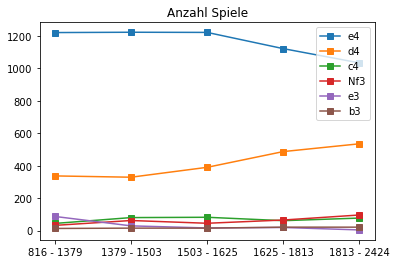

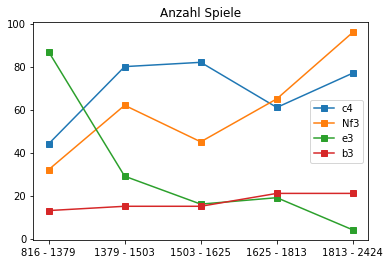

Sieganteil weiß gg.über schwarz, p-Werte Homogenitätstest:
e4
816 - 1378: 0.641646978283936
1378 - 1502: 0.28912435784585877
1502 - 1620: 0.3176496480441947
1621 - 1805: 0.9020650117187697
1805 - 2412: 0.7254938028418211
Spearman Korrelation: -0.19999999999999998, p-Wert: 0.747060078104662
d4
816 - 1378: 0.7691025361569785
1378 - 1502: 0.04448832838693177
1502 - 1620: 0.44218525092311256
1621 - 1805: 0.18779925110203216
1805 - 2412: 0.0008870823430987178
Spearman Korrelation: -0.3, p-Wert: 0.6238376647810728
c4
816 - 1378: 0.5204437039711349
1378 - 1502: 0.21615420809989067
1502 - 1620: 0.11821655257699916
1621 - 1805: 0.2793273061676913
1805 - 2412: 0.6300115693249838
Spearman Korrelation: -0.49999999999999994, p-Wert: 0.39100221895577053
Nf3
816 - 1378: 0.12229263414014639
1378 - 1502: 0.6618863783720474
1502 - 1620: 0.10243915357454322
1621 - 1805: 0.2833812600059873
1805 - 2412: 0.07801329961032002
Spearman Korrelation: -0.09999999999999999, p-Wert: 0.8728885715695383
e3
816 - 1378

In [213]:
div = 5
moves = moves_tbl['first_move'].tolist()
winner2 = {'white': np.zeros((len(moves),div)), 'black': np.zeros((len(moves),div)), 'draw': np.zeros((len(moves),div))}
winner2_wb = {'white': np.zeros((len(moves),div)), 'black': np.zeros((len(moves),div))}
winner_wb = {'white': np.zeros((len(moves),div)), 'black': np.zeros((len(moves),div))}

winner = {'white': np.zeros((len(moves),div)), 'black': np.zeros((len(moves),div)), 'draw': np.zeros((len(moves),div))}
rating = list(str(" ") * div)
rating_wb = list(str(" ") * div)

  
for i in range(1,div+1):
    min_rat = min(df2["avg_rating"].sort_values().iloc[(i-1)*int(len(df2)/div):i*int(len(df2)/div)])
    max_rat = max(df2["avg_rating"].sort_values().iloc[(i-1)*int(len(df2)/div):i*int(len(df2)/div)])
    df3 = df2[(df2["avg_rating"] >= min_rat) & (df2["avg_rating"] <= max_rat)]
    
    min_rat_wb = min(df2[df2['winner'] != 'draw']["avg_rating"].sort_values().iloc[(i-1)*int(len(df2[df2['winner'] != 'draw'])/div):i*int(len(df2[df2['winner'] != 'draw'])/div)])
    max_rat_wb = max(df2[df2['winner'] != 'draw']["avg_rating"].sort_values().iloc[(i-1)*int(len(df2[df2['winner'] != 'draw'])/div):i*int(len(df2[df2['winner'] != 'draw'])/div)])
    df3_wb = df2[df2['winner'] != 'draw'][(df2[df2['winner'] != 'draw']["avg_rating"] >= min_rat) & (df2[df2['winner'] != 'draw']["avg_rating"] <= max_rat)]
    
    first_move = list(str(" ") * len(moves))
    rating[i-1] = str(int(min_rat)) + ' - ' + str(int(max_rat))
    rating_wb[i-1] = str(int(min_rat_wb)) + ' - ' + str(int(max_rat_wb))
    
    winner_perc = {"white": np.zeros(len(moves)), "black": np.zeros(len(moves)), "draw": np.zeros(len(moves))}
    for k in range(len(moves)):        
        first_move[k] = moves[k]
        if len(df3[df3["first_move"] == moves[k]]) > 0:
            for j in df3["winner"].unique():                
                # Prozentual:
                winner2[j][k][i-1] = len(df3[(df3["first_move"] == moves[k]) & (df3["winner"] == j)]) / len(df3[df3["first_move"] == moves[k]])    
                # winner_perc[j][k] = len(df3[(df3["first_move"] == moves[k]) & (df3["winner"] == j)]) / len(df3[df3["first_move"] == moves[k]])            
                # Absolut:
                winner[j][k][i-1] = len(df3[(df3["first_move"] == moves[k]) & (df3["winner"] == j)])
                
                if j != 'draw':
                    winner2_wb[j][k][i-1] = len(df3_wb[(df3_wb["first_move"] == moves[k]) & (df3_wb["winner"] == j)]) / len(df3_wb[df3_wb["first_move"] == moves[k]])
                    winner_wb[j][k][i-1] = len(df3_wb[(df3_wb["first_move"] == moves[k]) & (df3_wb["winner"] == j)])
                

# Scatterplot: x-Achse: Rating, y-Achse: Gewinnanteil für versch. erste Züge
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(rating_wb, winner2_wb['white'][i], marker = 's', label = moves[i])
ax.legend(loc = "best") 
ax.set_title('Win percentage white')
plt.show()

fig, ax = plt.subplots()
for i in range(4):
    ax.plot(rating, winner2['draw'][i], marker = 's', label = moves[i])
ax.legend(loc = "best") 
ax.set_title('Draw percentage')
plt.show()

# Häufigkeiten jeweiliger erster Züge
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(rating, winner['white'][i] + winner['black'][i] + winner['draw'][i], marker = 's', label = moves[i])
ax.legend(loc = "best") 
ax.set_title('Anzahl Spiele')
plt.show()

fig, ax = plt.subplots()
for i in range(2, 6):
    ax.plot(rating, winner['white'][i] + winner['black'][i] + winner['draw'][i], marker = 's', label = moves[i])
ax.legend(loc = "best") 
ax.set_title('Anzahl Spiele')
plt.show()

# Signifikanztests
# Vergleiche Siegchance weiß für jede Spielwertungsabstufung für jeden Zug
print('Sieganteil weiß gg.über schwarz, p-Werte Homogenitätstest:')
for j in range(len(winner_wb['white'])):
    wins = [winner_wb['white'][j].tolist(),  winner_wb['black'][j].tolist()]
    print(str(moves[j]))
    for i in range(len(wins[0])):
        wins_firstmov_i = [wins[0][i], wins[1][i]]
        wins_test = stats.chisquare(f_obs = wins_firstmov_i, f_exp = [sum([wins[0][i], wins[1][i]]) * len(df2[(df2["winner"] == 'white')])  / len(df2[df2['winner'] != 'draw']), sum([wins[0][i], wins[1][i]]) * len(df2[(df2["winner"] == 'black')])  / len(df2[df2['winner'] != 'draw'])])
        print(str(rating_wb[i]) + ': ' + str(wins_test.pvalue))
    spearm = stats.spearmanr(winner_wb['white'][j] / (winner_wb['white'][j] + winner_wb['black'][j]), range(div))
    print('Spearman Korrelation: ' + str(spearm.statistic) + ', p-Wert: ' + str(spearm.pvalue))
        
# Remis-Rate
print('Remis-Rate: ')
for j in range(len(winner['white'])):
    draws = [(winner['white'][j] + winner['black'][j]).tolist(), winner['draw'][j].tolist()]
    print(str(moves[j]))
    for i in range(len(wins[0])):
        draws_firstmov_i = [draws[0][i], draws[1][i]]
        draws_test = stats.chisquare(f_obs = draws_firstmov_i, f_exp = [sum([draws[0][i], draws[1][i]]) * len(df2[(df2["winner"] != 'draw')])  / len(df2), sum([draws[0][i], draws[1][i]]) * len(df2[(df2["winner"] == 'draw')])  / len(df2)])
        print(str(rating[i]) + ': ' + str(draws_test.pvalue))
    spearm = stats.spearmanr(winner['draw'][j] / (winner['white'][j] + winner_wb['black'][j] + winner['draw'][j]), range(div))
    print('Spearman Korrelation: ' + str(spearm.statistic) + ', p-Wert: ' + str(spearm.pvalue))


### En passant Analyse
- Check for each game, if en passant was possible or happened!
- En passant possible for white, when white has a pawn on 5th rank and black moves from 7th to 5th with a pawn on a lane next to the lane of the white pawn 

In [16]:
import en_passant as ep # Import selfmade function to find en passant

enp_pos = 0
enp_played = 0

for j in [1300, 1800, 2300, 2800]:
    for i in df[(df["white_rating"] < j) & (df["white_rating"] > j - 500)]["moves"]:
        res = ep.search(i)
        enp_pos = enp_pos + res['white_pos'] + res['black_pos']
        enp_played = enp_played + res['white_played'] + res['black_played']

    print('En passant Möglichkeiten:', enp_pos, '; Anteil:', round(100 * enp_pos/len(df), 2), '%')
    print('En passant gespielt:', enp_played, '; Anteil:', round(100 * enp_played/len(df), 2), '%')
    print('Anteil "En passant gespielt, wenn möglich":', round(100 * enp_played/enp_pos, 2), '%')

En passant Möglichkeiten: 262 ; Anteil: 1.31 %
En passant gespielt: 63 ; Anteil: 0.31 %
Anteil "En passant gespielt, wenn möglich": 24.05 %
En passant Möglichkeiten: 1059 ; Anteil: 5.28 %
En passant gespielt: 277 ; Anteil: 1.38 %
Anteil "En passant gespielt, wenn möglich": 26.16 %
En passant Möglichkeiten: 1379 ; Anteil: 6.88 %
En passant gespielt: 387 ; Anteil: 1.93 %
Anteil "En passant gespielt, wenn möglich": 28.06 %
En passant Möglichkeiten: 1392 ; Anteil: 6.94 %
En passant gespielt: 392 ; Anteil: 1.95 %
Anteil "En passant gespielt, wenn möglich": 28.16 %
